In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown
# from google.colab import files
# uploaded = files.upload()

### Prikazy na stiahnutie z excelu a ulozenie do csv kvoli nacitavaniu
# dog_info = pd.read_excel("data-for-publication.xlsx", sheet_name="Information", header=0)
# dog_info.to_csv("psy_info.csv")
# files.download("psy_info.csv")

## Stiahnem data a ulozim ich v csv a vyrobim dataframe dogs a dogs info

In [56]:
dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")
# display(dogs.head())
dog_info = pd.read_csv("psy_info.csv", header=1)
# print(dogs.columns[10:100])


### Pod tymto Agresivita, ale neni dobry ten graf, lebo neberie do uvahy mnozstvo samcov a samic
#### bud ho vyhodim alebo opravim

mnozstvo plemien: 52
mnozstvo samcov: 7237
mnozstvo samic: 8134


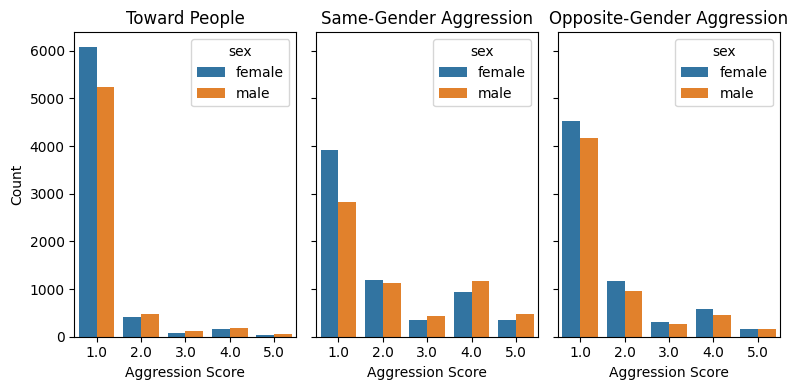

In [57]:
print('mnozstvo plemien:', len(dogs["breed_group"].unique()))
a = dogs.groupby("breed_group")["Aggressive_people"].mean(numeric_only=True)

## JEDNOTLIVE PLEMENA
# print("jednotlive plemena:")
# display(a.sort_values())

print('mnozstvo samcov:', len(dogs.query("sex=='male'")))
print('mnozstvo samic:', len(dogs.query("sex=='female'")))

male_count = len(dogs.query("sex=='male'"))
female_count = len(dogs.query("sex=='female'"))


plot, axes = plt.subplots(1, 3, figsize=(8, 4), sharey=True)

# dogs
sns.countplot(data=dogs, hue="sex", x='Aggressive_people', ax=axes[0])
axes[0].set(title='Toward People', xlabel='Aggression Score', ylabel='Count')

sns.countplot(data=dogs, hue="sex", x='Aggressive_dogs_samegender', ax=axes[1])
axes[1].set(title='Same-Gender Aggression', xlabel='Aggression Score', ylabel='Count')

sns.countplot(data=dogs, hue="sex", x='Aggressive_dogs_oppositegender', ax=axes[2])
axes[2].set(title='Opposite-Gender Aggression', xlabel='Aggression Score', ylabel='Count')

plot.tight_layout()
plt.show()

### Tento je dobry
#### tiez agresivita, samce vs samice, ale kompaktny

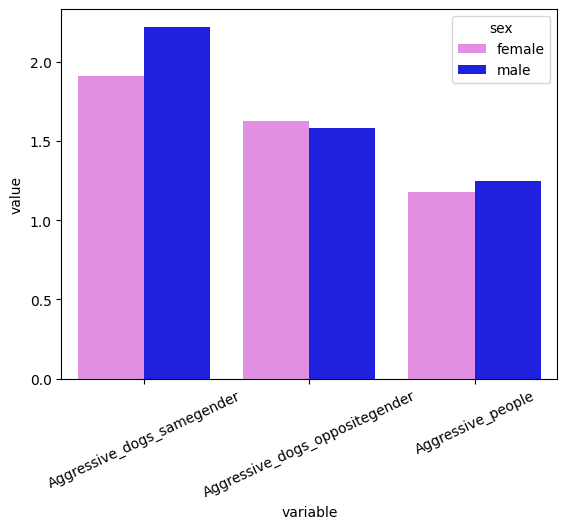

In [58]:

figure, axes = plt.subplots(1, 1)
agresivita_gender = dogs.groupby('sex')[['Aggressive_dogs_samegender', 'Aggressive_dogs_oppositegender', 'Aggressive_people']].mean().reset_index().melt(id_vars='sex')
# display(agresivita_gender)
sns.barplot(agresivita_gender, x='variable', y='value', hue='sex', palette={'male':'blue', 'female':'violet'})
axes.tick_params(axis='x', rotation=25)



### Tuto by som este chcel spravit ze to spravim pre cele tabulky, a zistim v ktorych veciach maju najvacsi rozdiel samce a samice
(ten barpraf dole)
nejak to odictat a zistit najvacsi rozdiel alebo nieco take

Text(0.5, 1.0, 'female')

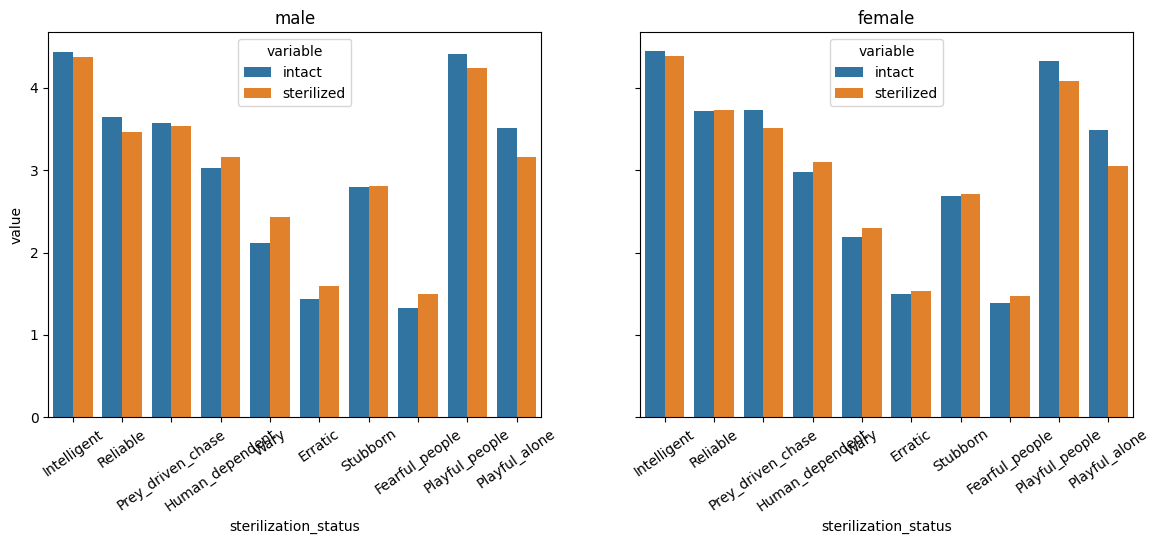

In [69]:
# display(dogs.query('sex=="male"').head())
# display(dogs.head())


kastracia_male = dogs.query('sex=="male"').groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[26:36]
kastracia_male["sterilization_status"] = kastracia_male.index
kastracia_male.index.name = "index"
kastracia_male.columns.name = None
dogs_melted_male = (kastracia_male.melt(id_vars=["sterilization_status"]))
dogs_melted_male = dogs_melted_male.set_index("sterilization_status")

# display(kastracia_male)
# display(dogs_melted_male)

kastracia_female = dogs.query('sex=="female"').groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[26:36]
kastracia_female["sterilization_status"] = kastracia_female.index
kastracia_female.index.name = "index"
kastracia_female.columns.name = None
dogs_melted_female = (kastracia_female.melt(id_vars=["sterilization_status"]))
dogs_melted_female = dogs_melted_female.set_index("sterilization_status")

# display(kastracia_female)
# display(dogs_melted_female)


# print(kastracia_female.shape)
# print(kastracia_male.shape)

figure, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
sns.barplot(data=dogs_melted_male, x=dogs_melted_male.index, y="value", hue="variable", ax=axes[0])
axes[0].tick_params(axis='x', rotation=35)
axes[0].set_title("male")
sns.barplot(data=dogs_melted_female, x=dogs_melted_female.index, y="value", hue="variable", ax=axes[1])
axes[1].tick_params(axis='x', rotation=35)
axes[1].set_title("female")


### TUto su casti tabulky vypisane

In [ ]:
# print(dogs.shape)
# print(len(dogs.transpose()))

# dogs_demographic = dogs.transpose().iloc[0:12]
# dogs_environment = dogs.transpose().iloc[12:43]
# dogs_personality = dogs.transpose().iloc[43:113]
# dogs_noise_sensitivity = dogs.transpose().iloc[113:155]
# dogs_fearfullness = dogs.transpose().iloc[155:190]
# dogs_aggression = dogs.transpose().iloc[190:215]
# dogs_fear_surfaces = dogs.transpose().iloc[215:223]
# dogs_fear_surfaces = dogs.transpose().iloc[223:233]
# dogs_inattention = dogs.transpose().iloc[233:250]

### Tuto je agresivita psov
##### ku psom, majitelom a cudzncom
podla veku 

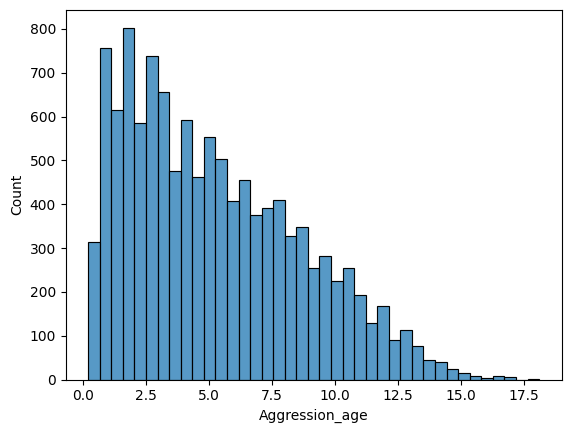

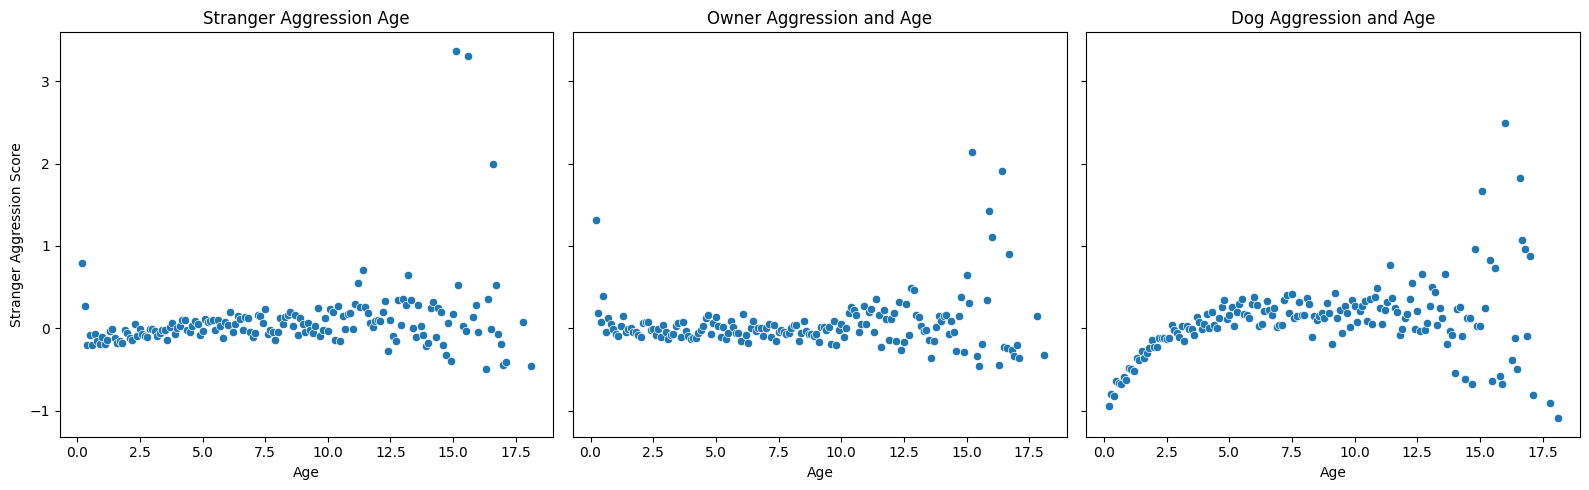

In [ ]:
psy = dogs.copy(deep=True)
psy["Aggression_age"] = psy["Aggression_age"].round(1)
a = psy.groupby("Aggression_age")["stranger_aggression_score"].mean()
a = pd.DataFrame(a)

b = psy.groupby("Aggression_age")["owner_aggression_score"].mean()
b = pd.DataFrame(b)


c = psy.groupby("Aggression_age")["dog_aggression_score"].mean()
c = pd.DataFrame(c)


ax = sns.histplot(data=psy, x="Aggression_age")


figure, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
sns.scatterplot(x=a.index, y=a["stranger_aggression_score"], ax=axes[0])
axes[0].set_title("Stranger Aggression Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Stranger Aggression Score")

# Scatterplot 2
sns.scatterplot(x=b.index, y=b["owner_aggression_score"], ax=axes[1])
axes[1].set_title("Owner Aggression and Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Owner Aggression Score")

# Scatterplot 3
sns.scatterplot(x=c.index, y=c["dog_aggression_score"], ax=axes[2])
axes[2].set_title("Dog Aggression and Age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Dog Aggression Score")

plt.tight_layout()
plt.show()


## Toto este odkladam

In [62]:
# kastracia_demographic = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[:12]
# kastracia_environment = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[12:43]
# kastracia_personality = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[43:113]
# kastracia_noise_sensitivity = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[113:155]
# kastracia_fearfullness = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[155:190]
# kastracia_aggression = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[190:215]
# kastracia_fear_surfaces = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[215:223]
# kastracia_fear_surfaces = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[223:233]
# kastracia_inattention = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[233:]

# kastracia_environment["sterilization_status"] = kastracia_environment.index
# kastracia_environment.index.name = "index"
# kastracia_environment.columns.name = None
# display(kastracia_environment)

# kastracia_personality["sterilization_status"] = kastracia_personality.index
# kastracia_personality.index.name = "index"
# kastracia_personality.columns.name = None
# display(kastracia_personality)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)

### Teraz spravim podobne impulzivitu a nepozornost
nasiel som jemnu zavislost, impulzivita stupa a vrcholi okolo 1 roka, potom pomaly klesa, nepozornost je na tom velmi podobne



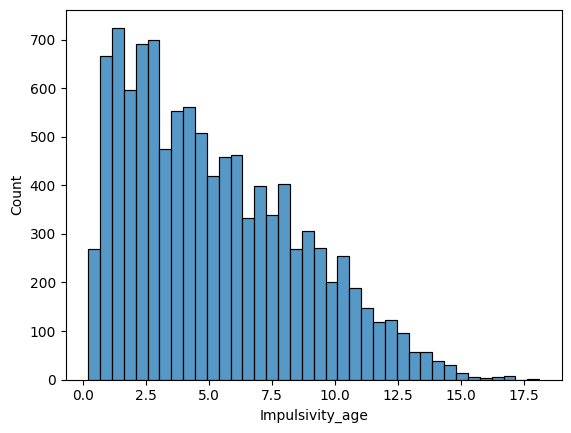

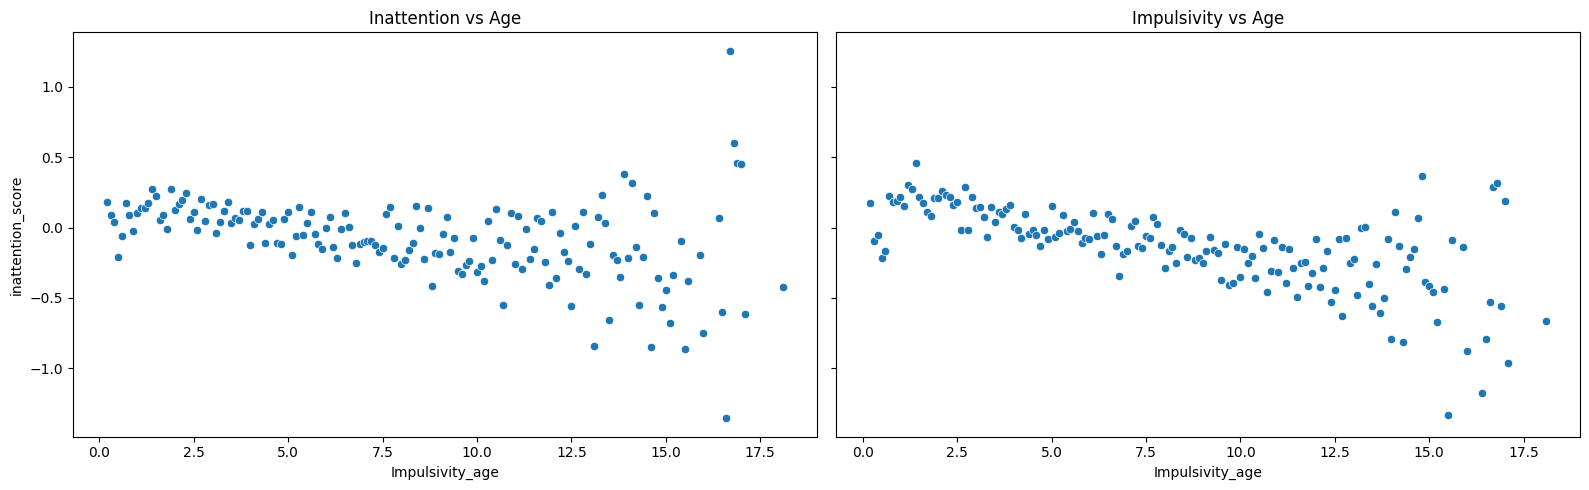

In [ ]:
psy2 = dogs.copy(deep=True)
psy2["Impulsivity_age"] = psy2["Impulsivity_age"].round(1)
d = psy2.groupby("Impulsivity_age")["inattention_score"].mean()
d = pd.DataFrame(d)

e = psy2.groupby("Impulsivity_age")["impulsivity_score"].mean()
e = pd.DataFrame(e)

ax = sns.histplot(data=psy2, x="Impulsivity_age")

figure, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
sns.scatterplot(x=d.index, y=d["inattention_score"], ax=axes[0])
axes[0].set_title("Inattention vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Inattention score")

# Scatterplot 2
sns.scatterplot(x=e.index, y=e["impulsivity_score"], ax=axes[1])
axes[1].set_title("Impulsivity vs Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Impulsivity Score")

plt.tight_layout()
plt.show()

### Teraz spravim podobne strach
pri strachu ale nevidim ziadnu suvislost




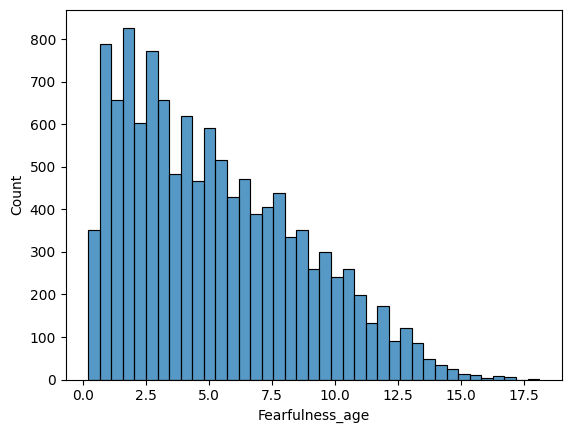

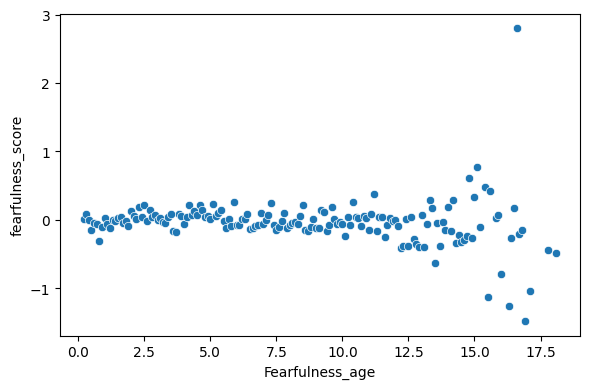

In [78]:
psy3 = dogs.copy(deep=True)
psy3["Fearfulness_age"] = psy3["Fearfulness_age"].round(1)
f = psy3.groupby("Fearfulness_age")["fearfulness_score"].mean()
f = pd.DataFrame(f)
ax = sns.histplot(data=psy3, x="Fearfulness_age")

figure, axes = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
sns.scatterplot(x=f.index, y=f["fearfulness_score"], ax=axes)

plt.tight_layout()
plt.show()



### Priemerne hmotnosti jednotlivych plemien barplot


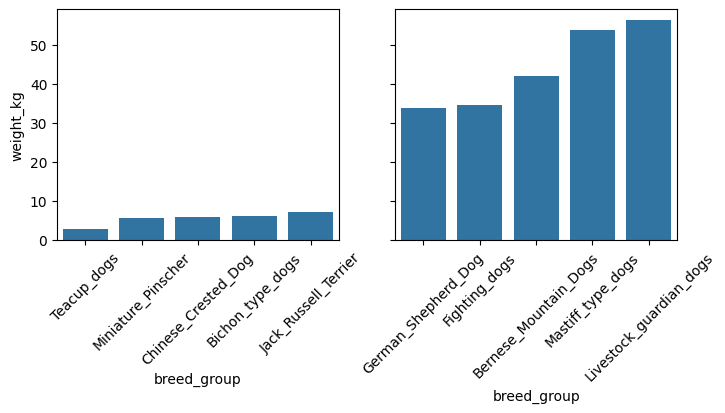

In [71]:

psy_hmostnost_max = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).head()
psy_hmostnost_min = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).tail()

figure, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
sns.barplot(data=psy_hmostnost_max, x=psy_hmostnost_max.index, y='weight_kg', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=psy_hmostnost_min, x=psy_hmostnost_min.index, y='weight_kg', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)


pocty_psov = pd.DataFrame(dogs.groupby("breed_group").count().sort_values(by="sex"))
# figure, axes1 = plt.subplots(1, 1)
# display(pocty_psov)
# sns.histplot(data=pocty_psov, ax=axes1)

### Teraz Spravim Agresivitu vs Strach

,stranger_aggression_score
fearfulness_score,
-1.5,-0.411272
-1.4,-0.377528
-1.3,-0.359862
-1.2,-0.335000
-1.1,-0.337610
...,...
4.2,1.334520
4.3,0.558226
4.5,1.450916


,owner_aggression_score
fearfulness_score,
-1.5,-0.256088
-1.4,-0.211439
-1.3,-0.141234
-1.2,-0.149274
-1.1,-0.186991
...,...
4.2,1.320082
4.3,-0.324103
4.5,-0.099649


Text(0.5, 1.0, 'owner Agression Fearfulness')

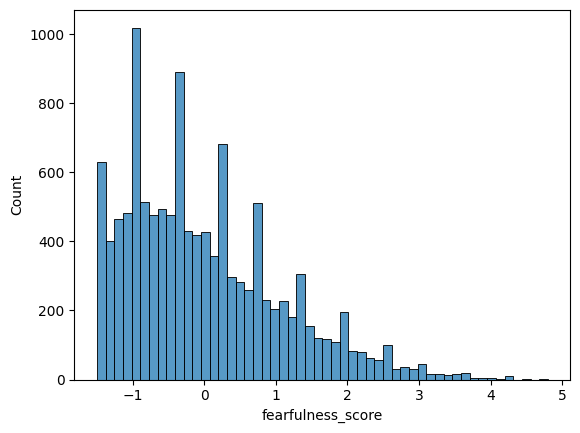

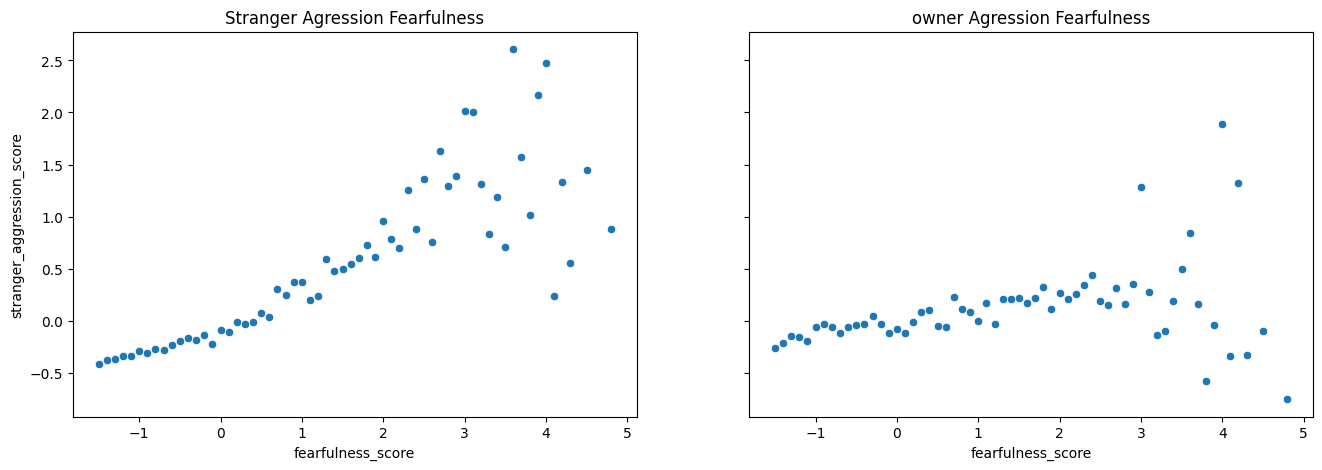

In [ ]:

psy4 = dogs.copy(deep=True)
psy4["fearfulness_score"] = psy4["fearfulness_score"].round(1)

psy4_stranger = psy4.groupby("fearfulness_score")["stranger_aggression_score"].mean()
psy4_stranger = pd.DataFrame(psy4_stranger)
display(psy4_stranger)

psy4_owner = psy4.groupby("fearfulness_score")["owner_aggression_score"].mean()
psy4_owner = pd.DataFrame(psy4_owner)
display(psy4_owner)

ax = sns.histplot(data=psy4, x="fearfulness_score")

figure, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
sns.scatterplot(x=psy4_stranger.index, y=psy4_stranger["stranger_aggression_score"], ax=axes[0])
axes[0].set_title("Stranger Agression Fearfulness")
sns.scatterplot(x=psy4_owner.index, y=psy4_owner["owner_aggression_score"], ax=axes[1])
axes[1].set_title("owner Agression Fearfulness")


### Este dokoncit tretiu agresivitu

